In [1]:
import pandas as pd
import os
import numpy as np
from copy import deepcopy

In [2]:
st = pd.HDFStore(os.path.expanduser("~/all.h5"), mode='r')

In [3]:
metadata_df = pd.read_csv("metadata/metadata.csv",index_col=0)

In [4]:
feeds = {'use':'aggregate',
        'air1':'hvac',
         'clotheswasher1':'wm',
         'dishwasher1':'dw',
         'microwave1':'mw',
         'refrigerator1':'fridge',
         'oven1':'oven',
        'car1':'ec',
         'waterheater1':'wh',
         'drye1':'dr'
        }

In [5]:
cities = ['Austin','Houston','San Diego','Boulder']

In [6]:
years = {
    2014:{'start':'1-1-2014', 'end':'12-31-2014', 'start_month':1, 'end_month':12, 'months':1},
    2015:{'start':'1-1-2015', 'end':'12-31-2015', 'start_month':1, 'end_month':12, 'months':1},
    2016:{'start':'1-1-2016', 'end':'12-31-2016', 'start_month':1, 'end_month':12, 'months':1}
    }

In [7]:
metadata_df[metadata_df.city=='Boulder'].index

Int64Index([4974, 7213, 6282, 3659, 9229, 2144,  698, 1350, 1766, 2523, 2903,
            3734, 4499, 4703, 4830, 5187, 6083, 6148, 6174, 6956, 7001, 7208,
            8368, 9341, 9818,  879, 2196, 5648, 5954, 8676, 3353,  232,  516,
             547, 1879, 2824, 2931, 3104, 4601, 6264, 6800, 6888, 7818, 8273,
            8622, 8729, 8862, 9085, 9142, 9156, 9958, 5904, 8395, 4920, 5652,
            4147, 5400, 8555],
           dtype='int64', name=u'dataid')

/Users/nipunbatra/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


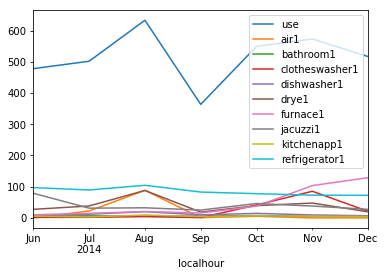

In [8]:
r = st['/1350']['2014']
%matplotlib inline
r.resample("1M", how='mean').plot()

In [9]:
out_overall = {}
year = 2015
year_dict = years[year]
out_overall[year] = {}
to_ignore = []
for city in ['Austin']:
    print city

    city_data = metadata_df[metadata_df['city'] == city]
    city_homes = city_data.index.values.astype('int')
    out = {}
    for home in city_homes[:]:

        if home in to_ignore:
            continue
        
        try:
            data_df = st['/%d' %home][year_dict['start']:year_dict['end']]
            data_df_resampled = data_df.resample("1D").sum()
            df_res_kwh = data_df_resampled.div(1)
            df_res_kwh.index = df_res_kwh.index.dayofyear
            # Find months where we have less than 21 hours worth data and ignore those months
            day_res = data_df.resample("1H").sum()['use'].dropna()
            a = pd.value_counts(day_res.index.day)
            lt_21_hours = a[a<23].index.values

            for m in lt_21_hours:
                df_res_kwh.loc[m] = np.NAN

            temp = {}
            for feed_name, feed_value in feeds.iteritems():
                temp[feed_value] = []
                for day in range(1, 366):


                    try:
                        temp[feed_value].append(df_res_kwh.loc[day, feed_name])
                    except:

                        temp[feed_value].append(np.NAN)
            out[home] = np.hstack(temp.values())




        except Exception, e:
            print e, city, home
            pass
    appliances = temp.keys()
    col_headers = []
    for appliance in appliances:
        for day in range(1, 366):
            col_headers.append(appliance+"_"+str(day))
    df = pd.DataFrame(out).T
    df.columns = col_headers

    # Read metadata
    mdf = pd.read_csv("metadata/%s_md.csv" %city.replace(" ",""), index_col=0)
    for column in mdf.columns:
        df[column] = mdf[column]

    city = city.replace(" ","")
    out_overall[year][city] =df

    tdf = df[['aggregate_'+str(month) for month in range(1, 13)]].dropna().copy()
    full_agg = {}


    for home in df.index:
        if home in tdf.index:
            full_agg[home] = 1


        else:
            full_agg[home] = 0


Austin
'No object named /2836 in the file' Austin 2836
'No object named /2743 in the file' Austin 2743
'No object named /5323 in the file' Austin 5323
'No object named /8560 in the file' Austin 8560
'No object named /3313 in the file' Austin 3313
'No object named /5052 in the file' Austin 5052
'No object named /3936 in the file' Austin 3936
'No object named /1622 in the file' Austin 1622
'No object named /1114 in the file' Austin 1114
'No object named /5433 in the file' Austin 5433
'No object named /1101 in the file' Austin 1101
'No object named /3824 in the file' Austin 3824
'No object named /78 in the file' Austin 78
'No object named /5839 in the file' Austin 5839
'No object named /1050 in the file' Austin 1050
'No object named /18 in the file' Austin 18
'No object named /35 in the file' Austin 35
'No object named /964 in the file' Austin 964
'No object named /1852 in the file' Austin 1852
'No object named /2345 in the file' Austin 2345
'No object named /2645 in the file' Austin 2645

'No object named /3026 in the file' Austin 3026
'No object named /2692 in the file' Austin 2692
'No object named /3085 in the file' Austin 3085
'No object named /4806 in the file' Austin 4806
'No object named /9051 in the file' Austin 9051
'No object named /4437 in the file' Austin 4437
'No object named /9890 in the file' Austin 9890
'No object named /2323 in the file' Austin 2323
'No object named /6133 in the file' Austin 6133
'No object named /3705 in the file' Austin 3705
'use' Austin 9642
'No object named /8370 in the file' Austin 8370
'use' Austin 3484
'No object named /9176 in the file' Austin 9176
'No object named /111 in the file' Austin 111
'No object named /4408 in the file' Austin 4408
'use' Austin 8282
'No object named /8107 in the file' Austin 8107
'No object named /1035 in the file' Austin 1035
'No object named /5586 in the file' Austin 5586
'No object named /6502 in the file' Austin 6502
'No object named /6787 in the file' Austin 6787
'No object named /807 in the file' A

In [10]:
out

{22: array([ 4405.03320312,  9587.33300781,  5755.91650391, ...,            nan,
                   nan,            nan]),
 26: array([ 6.5333333 ,  2.2833333 ,  0.88333333, ...,         nan,
                nan,         nan]),
 48: array([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 59: array([ 37135.08203125,  37209.78515625,  31760.        , ...,
          2659.54980469,   3000.41674805,   1698.43334961]),
 68: array([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 77: array([ 43706.3671875 ,  37362.30078125,  29753.43359375, ...,
                    nan,             nan,             nan]),
 86: array([  1.        ,  10.71666622,  20.36666679, ...,   0.96666664,
          1.73333335,   1.73333335]),
 93: array([ 1013.29998779,   959.93334961,   869.91668701, ...,     0.        ,
            0.        ,     0.        ]),
 94: array([   0.        ,    0.        ,    0.        , ...,  518.13336182,
           0.73333335,  439.16668701]),
 101: array([  2.13333344e+00,   1.51666665e+00,   8.

In [11]:
def remove_lt(out_overall):
    for region in ['Austin']:
    #for region in ['SanDiego','Austin']:
        for year in [2015]:
        #for year in [2014, 2015, 2016]:
            df = out_overall[year][region]
            to_remove_agg_lt_appliance = []
            for appliance in ['hvac','wm','dw','mw','fridge','oven']:
                for month in range(1, 13):
                    a=df.query('aggregate_%d<1.35*%s_%d' %(month, appliance, month))
                    if len(a):
                        for x in a.index.values:
                            if x not in to_remove_agg_lt_appliance:
                                to_remove_agg_lt_appliance.append(x)
            print to_remove_agg_lt_appliance, year, region
            out_overall[year][region] = out_overall[year][region].drop(to_remove_agg_lt_appliance)
            
    return out_overall

In [12]:
out_overall = remove_lt(out_overall)

[1069, 7638] 2015 Austin


### Removing outliers based on aggregate

1. Remove high energy using z-score test

In [13]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [15]:
out_overall[2015]['Austin'].isnull().sum().sum()

1330566L

In [16]:
df['%s_%d' %(appliance, month)].dropna()

59       7012.250000
86       4969.333496
93          0.000000
94        118.666664
101      5014.183594
115         0.000000
121     12029.866211
130      1267.349976
187      4896.083496
267      4726.200195
364         5.383333
370        19.200001
410      5810.867188
434      8305.433594
507         0.000000
624         5.900000
661         0.333333
668      2286.683350
739         0.000000
781      3500.199951
871      7008.816406
974     19434.833984
1037     3928.733398
1169        1.800000
1185     1954.066650
1192       44.750000
1283        0.100000
1310     7834.816895
1314       91.566666
1415     2476.800049
            ...     
8645     4249.349609
8767        0.550000
8848     2849.016846
8956       15.283334
8995     3157.800049
9019     2865.133301
9052        8.166667
9134        0.000000
9215     1201.633301
9248    10408.849609
9278      741.533325
9295     3084.466797
9356      262.149994
9484        1.233333
9578        0.066667
9613      786.366638
9654        7

In [ ]:
appliance, month = 'oven', 1
d = out_overall[2014]['Austin']['%s_%d' %(appliance, month)].dropna()
drop_outlier = d.index[is_outlier(d, thresh=5)].values
drop_outlier

In [ ]:
d.ix[drop_outlier]

In [17]:
from copy import deepcopy
ooc = deepcopy(out_overall)

In [18]:
out_overall =deepcopy(ooc)

In [ ]:
APPLIANCES_ORDER = ['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven']
year = 2014
to_remove = {}
for region in ['Austin','SanDiego']:
    to_remove[region] = {}
    for year in [2014, 2015, 2016]:
        to_remove[region][year] = {}
        f = out_overall[year][region].copy()
        for appliance in APPLIANCES_ORDER :
            to_remove[region][year][appliance] = []

            for month in range(1, 13):


                # Dropping outlier
                d = f['%s_%d' %(appliance, month)].dropna()
                drop_outlier = d.index[is_outlier(d, thresh=5)].values
                for x in drop_outlier:
                    to_remove[region][year][appliance].append((x, month))

                    f = f.set_value(x, '%s_%d' %(appliance, month),np.NAN)
        out_overall[year][region]=f

In [ ]:
# Setting for missing data
def set_nan(home , months, year=2014, region='Austin'):
    for appliance in APPLIANCES_ORDER:
        for month in months:
            out_overall[year][region] = out_overall[year][region].set_value(home, '%s_%d' %(appliance, month), np.NaN)


In [ ]:
set_nan(2378, [5, 6, 7])
set_nan(4297, [6, 7])
set_nan(8086, [5, 6, 7, 8, 9])
set_nan(7017, [7, 8, 9])
set_nan(6941, [8])
set_nan(527, range(1, 13))

In [ ]:
out_overall[2014]['Austin'].get_value(2378, 'wm_5')

In [ ]:
f.loc[x, '%s_%d' %(appliance, month)]

In [ ]:
out_overall[2014]['Austin']['oven_1'].dropna()

In [19]:
import pickle

In [20]:
pickle.dump(out_overall, open('metadata/daily.pkl','w'))

In [ ]:
out_overall[year][region].loc[x,'%s_%d' %(appliance, month)]

In [ ]:
out_overall[2014]['Austin'].loc[9745,'%s_%d' %('oven', 1)]

In [ ]:
out_overall[2015]['Austin']